In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle
pickle.HIGHEST_PROTOCOL = 4
# import pandas

In [2]:
df = pd.read_json('/content/df_final1_p4.json')
df = df[(df['Season']>2009)]#&df['Inj_Loc_Knee'].eq(1)]#['Inj_Duration_Cat'].value_counts()

In [7]:
null_col = ['days_lst_gm', 'mp_lst_gm', 'pts_last_game', 'reb_lst_gm', 'ast_lst_gm',
            'pm_lst_gm', 'gms_7d', 't_mp_7d', 't_pm_7d', 'mpg_7d', 'ppg_7d',
            'rpg_7d', 'apg_7d', 'pmg_7d', 'gms_14d', 't_mp_14d', 't_pm_14d',
            'mpg_14d', 'ppg_14d', 'rpg_14d', 'apg_14d', 'pmg_14d', 'gms_30d',
            't_mp_30d', 't_pm_30d', 'mpg_30d', 'ppg_30d', 'rpg_30d', 'apg_30d',
            'pmg_30d', 'gms_szn', 't_mp_szn', 't_pm_szn', 'mpg_szn', 'ppg_szn',
            'rpg_szn', 'apg_szn', 'pmg_szn', 'gms_career_b4', 't_mp_career_b4',
            't_pm_career_b4', 'mpg_career_b4', 'ppg_career_b4', 'rpg_career_b4',
            'apg_career_b4', 'pmg_career_b4']

In [19]:
# df.iloc[:,3:-1] = MinMaxScaler().fit_transform(df.iloc[:,3:-1])
# df.drop('Inj_Duration', axis=1, inplace=True)
df['Inj_Duration_Cat']=df['Inj_Duration_Cat'].astype('category')
df

,player,Team,bbref_id,height,weight,age,Season,days_lst_gm,mp_lst_gm,pts_last_game,reb_lst_gm,ast_lst_gm,pm_lst_gm,gms_7d,t_mp_7d,t_pm_7d,mpg_7d,ppg_7d,rpg_7d,apg_7d,pmg_7d,gms_14d,t_mp_14d,t_pm_14d,mpg_14d,ppg_14d,rpg_14d,apg_14d,pmg_14d,gms_30d,t_mp_30d,t_pm_30d,mpg_30d,ppg_30d,rpg_30d,apg_30d,pmg_30d,gms_szn,t_mp_szn,t_pm_szn,...,ppg_career_b4,rpg_career_b4,apg_career_b4,pmg_career_b4,League_Years,Num_Inj_Career,Num_Inj_Season,Inj_Date_Day,Inj_Date_Month,Inj_Date_Year,Inj_Date_DoW,POS_G,POS_F,POS_C,Inj_Type_Illness,Inj_Type_Rest,Inj_Loc_Head,Inj_Loc_Spine,Inj_Loc_Shoulder,Inj_Loc_Arm,Inj_Loc_Hand,Inj_Loc_Chest,Inj_Loc_Heart,Inj_Loc_Midsection,Inj_Loc_Leg,Inj_Loc_Knee,Inj_Loc_Lower_Leg,Inj_Loc_Ankle,Inj_Loc_Foot,Inj_Type_Soft_Tissue_1,Inj_Type_Soft_Tissue_2,Inj_Type_Dislocation,Inj_Type_Concussion,Inj_Type_Swell,Inj_Type_Sprain_Strain,Inj_Type_Break,Inj_Type_Cut,Surgery,On_IL,Inj_Duration_Cat
29913,Pau Gasol,Lakers,gasolpa01,84,250,29.10,2010,58.0,42.15,14.0,15.0,3.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.77,8.76,3.16,1.25,8,12,1,11,8,2009,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Months
29914,Jeff Ayres,Blazers,pendeje02,81,240,22.37,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,1,9,9,2009,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Months
29915,Richard Jefferson,Spurs,jefferi01,79,233,29.24,2010,153.0,31.65,31.0,4.0,1.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.40,5.27,2.90,0.98,8,9,1,15,9,2009,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Weeks
29916,Tim Thomas,Mavericks,thomati01,82,230,32.57,2010,152.0,10.02,4.0,1.0,0.0,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.67,4.20,1.55,0.39,12,38,1,22,9,2009,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,Weeks
29917,Matt Harpring,Jazz,harprma01,79,231,33.31,2010,149.0,4.30,2.0,2.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.31,5.00,1.35,0.21,11,29,1,23,9,2009,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,Out Of NBA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62218,James Harden,Nets,hardeja01,77,220,31.78,2021,1.0,0.72,0.0,1.0,0.0,-2.0,3.0,80.50,28.0,26.83,19.0,5.33,9.33,9.33,5.0,146.85,72.0,29.37,23.60,5.60,9.0,14.40,8.0,233.82,82.0,29.23,20.25,6.12,8.88,10.25,50.0,1791.87,176.0,...,24.92,5.46,6.45,3.82,11,27,7,6,6,2021,6,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,Week
62219,Jordan Nwora,Bucks,nworajo01,80,225,22.74,2021,11.0,5.13,0.0,0.0,0.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,13.37,4.0,6.68,2.50,1.00,0.0,2.00,6.0,56.57,-7.0,9.43,6.50,3.00,0.00,-1.17,32.0,286.92,1.0,...,5.50,1.94,0.22,0.03,0,2,2,7,6,2021,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Weeks
62221,Mike Conley,Jazz,conlemi01,73,175,33.66,2021,6.0,11.58,7.0,0.0,2.0,14.0,1.0,11.58,14.0,11.58,7.0,0.00,2.00,14.00,4.0,116.53,40.0,29.13,16.25,3.25,8.0,10.00,7.0,187.82,89.0,26.83,15.43,3.86,7.86,12.71,56.0,1647.20,599.0,...,15.07,3.04,5.74,1.95,13,46,9,8,6,2021,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,Week
62223,Sam Merrill,Bucks,merrisa01,76,205,25.07,2021,2.0,5.60,0.0,0.0,0.0,-1.0,1.0,5.60,-1.0,5.60,0.0,0.00,0.00,-1.00,3.0,10.95,-4.0,3.65,0.00,0.00,0.0,-1.33,7.0,51.40,-16.0,7.34,1.14,0.57,0.29,-2.29,34.0,250.47,-39.0,...,2.71,0.91,0.65,-1.15,0,2,2,9,6,2021,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0

In [20]:
X_ = df.iloc[:,3:]
# X_
# X_[null_col[1:]] = X_[null_col[1:]].fillna(0)
# X_.dropna(inplace=True)
# X_.drop('bbref_id', axis=1, inplace=True)
# X_ = pd.get_dummies(X_['Team'], drop_first=True).join(X_.iloc[:,1:])
X, y = X_.iloc[:,:-1].astype(float), X_.iloc[:,-1].cat.codes
# X[X.columns] = MinMaxScaler().fit_transform(X)
X

,height,weight,age,Season,days_lst_gm,mp_lst_gm,pts_last_game,reb_lst_gm,ast_lst_gm,pm_lst_gm,gms_7d,t_mp_7d,t_pm_7d,mpg_7d,ppg_7d,rpg_7d,apg_7d,pmg_7d,gms_14d,t_mp_14d,t_pm_14d,mpg_14d,ppg_14d,rpg_14d,apg_14d,pmg_14d,gms_30d,t_mp_30d,t_pm_30d,mpg_30d,ppg_30d,rpg_30d,apg_30d,pmg_30d,gms_szn,t_mp_szn,t_pm_szn,mpg_szn,ppg_szn,rpg_szn,...,mpg_career_b4,ppg_career_b4,rpg_career_b4,apg_career_b4,pmg_career_b4,League_Years,Num_Inj_Career,Num_Inj_Season,Inj_Date_Day,Inj_Date_Month,Inj_Date_Year,Inj_Date_DoW,POS_G,POS_F,POS_C,Inj_Type_Illness,Inj_Type_Rest,Inj_Loc_Head,Inj_Loc_Spine,Inj_Loc_Shoulder,Inj_Loc_Arm,Inj_Loc_Hand,Inj_Loc_Chest,Inj_Loc_Heart,Inj_Loc_Midsection,Inj_Loc_Leg,Inj_Loc_Knee,Inj_Loc_Lower_Leg,Inj_Loc_Ankle,Inj_Loc_Foot,Inj_Type_Soft_Tissue_1,Inj_Type_Soft_Tissue_2,Inj_Type_Dislocation,Inj_Type_Concussion,Inj_Type_Swell,Inj_Type_Sprain_Strain,Inj_Type_Break,Inj_Type_Cut,Surgery,On_IL
29913,84.0,250.0,29.10,2010.0,58.0,42.15,14.0,15.0,3.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.92,18.77,8.76,3.16,1.25,8.0,12.0,1.0,11.0,8.0,2009.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29914,81.0,240.0,22.37,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,9.0,9.0,2009.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29915,79.0,233.0,29.24,2010.0,153.0,31.65,31.0,4.0,1.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.64,17.40,5.27,2.90,0.98,8.0,9.0,1.0,15.0,9.0,2009.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29916,82.0,230.0,32.57,2010.0,152.0,10.02,4.0,1.0,0.0,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.25,11.67,4.20,1.55,0.39,12.0,38.0,1.0,22.0,9.0,2009.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29917,79.0,231.0,33.31,2010.0,149.0,4.30,2.0,2.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.13,11.31,5.00,1.35,0.21,11.0,29.0,1.0,23.0,9.0,2009.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62218,77.0,220.0,31.78,2021.0,1.0,0.72,0.0,1.0,0.0,-2.0,3.0,80.50,28.0,26.83,19.0,5.33,9.33,9.33,5.0,146.85,72.0,29.37,23.60,5.60,9.0,14.40,8.0,233.82,82.0,29.23,20.25,6.12,8.88,10.25,50.0,1791.87,176.0,35.84,24.44,7.70,...,34.52,24.92,5.46,6.45,3.82,11.0,27.0,7.0,6.0,6.0,2021.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
62219,80.0,225.0,22.74,2021.0,11.0,5.13,0.0,0.0,0.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,13.37,4.0,6.68,2.50,1.00,0.0,2.00,6.0,56.57,-7.0,9.43,6.50,3.00,0.00,-1.17,32.0,286.92,1.0,8.97,5.50,1.94,...,8.97,5.50,1.94,0.22,0.03,0.0,2.0,2.0,7.0,6.0,2021.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
62221,73.0,175.0,33.66,2021.0,6.0,11.58,7.0,0.0,2.0,14.0,1.0,11.58,14.0,11.58,7.0,0.00,2.00,14.00,4.0,116.53,40.0,29.13,16.25,3.25,8.0,10.00,7.0,187.82,89.0,26.83,15.43,3.86,7.86,12.71,56.0,1647.20,599.0,29.41,16.32,3.50,...,32.53,15.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_rs, y_rs = sm.fit_resample(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


ValueError: ignored

In [38]:
rf = RandomForestClassifier(verbose=True, n_jobs=10, n_estimators=500)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    2.3s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    5.4s
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:    6.3s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:    0.3s finished


0.45363601385148133

In [46]:
y_pred = rf.predict(X_test)
precision_score(y_test, y_pred, average=None).mean(),recall_score(y_test, y_pred, average=None).mean()


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:    0.3s finished


(0.43319407653541503, 0.31394937422285224)

Index(['mp_lst_gm', 't_mp_szn', 'gms_szn', 't_mp_7d', 'age', 'pmg_career_b4',
       't_pm_szn', 't_pm_career_b4', 'mpg_career_b4', 'mpg_7d',
       'ppg_career_b4', 'pmg_szn', 'rpg_career_b4', 'Num_Inj_Season',
       'pm_lst_gm', 'Num_Inj_Career', 'gms_career_b4', 't_mp_career_b4',
       'apg_career_b4', 'ppg_7d', 'mpg_szn', 'Inj_Date_Day', 'ppg_szn',
       't_mp_14d', 't_pm_7d', 'rpg_szn', 'pmg_7d', 't_mp_30d', 'rpg_14d',
       'mpg_14d', 'pmg_30d', 'ppg_30d', 'pmg_14d', 'pts_last_game', 'weight',
       't_pm_14d', 'days_lst_gm', 't_pm_30d', 'Season', 'mpg_30d', 'ppg_14d',
       'Inj_Date_Year', 'rpg_30d', 'apg_szn', 'apg_30d', 'rpg_7d', 'apg_14d',
       'height', 'reb_lst_gm'],
      dtype='object')

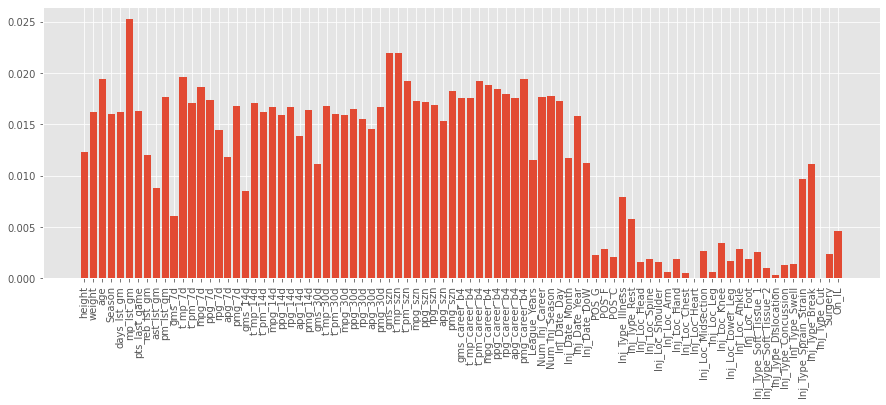

In [60]:
plt.figure(figsize=(15,5))
plt.bar(X.columns,rf.feature_importances_)
plt.xticks(rotation=90)
X.columns[np.argsort(rf.feature_importances_)[-1:-50:-1]]

In [ ]:
X.isnull().sum()[X.isnull().sum() > 0]

days_lst_gm    347
dtype: int64

In [ ]:
(100*df.isnull().sum()[df.isnull().sum() > 0]/len(df)).index

Index(['days_lst_gm', 'mp_lst_gm', 'pts_last_game', 'reb_lst_gm', 'ast_lst_gm',
       'pm_lst_gm', 'gms_7d', 't_mp_7d', 't_pm_7d', 'mpg_7d', 'ppg_7d',
       'rpg_7d', 'apg_7d', 'pmg_7d', 'gms_14d', 't_mp_14d', 't_pm_14d',
       'mpg_14d', 'ppg_14d', 'rpg_14d', 'apg_14d', 'pmg_14d', 'gms_30d',
       't_mp_30d', 't_pm_30d', 'mpg_30d', 'ppg_30d', 'rpg_30d', 'apg_30d',
       'pmg_30d', 'gms_szn', 't_mp_szn', 't_pm_szn', 'mpg_szn', 'ppg_szn',
       'rpg_szn', 'apg_szn', 'pmg_szn', 'gms_career_b4', 't_mp_career_b4',
       't_pm_career_b4', 'mpg_career_b4', 'ppg_career_b4', 'rpg_career_b4',
       'apg_career_b4', 'pmg_career_b4'],
      dtype='object')

In [ ]:
[100]*5

[100, 100, 100, 100, 100]

In [ ]:
from sklearn.neural_network import MLPClassifier
snn_classifier = MLPClassifier(verbose=True, hidden_layer_sizes = [100]*5)
snn_classifier.fit(X_train, y_train)
snn_classifier.score(X_test, y_test)
# snn_predictions = snn_classifier.predict(training_inputs)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
resampled_X_train, resampled_y_train = sm.fit_resample(X_train, y_train)

In [ ]:
snn_classifier = MLPClassifier(verbose=True, hidden_layer_sizes = [100]*5)
snn_classifier.fit(resampled_X_train, resampled_y_train)
snn_classifier.score(X_test, y_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier

dnns_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5, verbose=True))
dnns_classifier.fit(X_train, y_train)
dnns_classifier.score(X_test, y_test)

# dnns_predictions_labels = dnns_classifier.predict(training_inputs)

In [8]:
from sklearn.model_selection import GridSearchCV
xgbc = xgb.XGBClassifier(n_jobs=10,
    seed=42 ,objective='multi:softmax')
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=xgbc,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)
# m_train = xgb.DMatrix(X_train, y_train)

In [ ]:
# grid_search.fit(X, y)

In [13]:
xgbc.fit(X_train, y_train, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=10,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [14]:
xgbc.score(X_test, y_test)

0.46516939474685953

In [15]:
y_pred = xgbc.predict(X_test)

In [16]:
precision_score(y_test,y_pred, average=None).mean(), recall_score(y_test,y_pred, average=None).mean()

(0.3906740405543652, 0.3377189037079195)

In [28]:
# from sklearn.metrics import make_scorer,log_loss
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, make_scorer

scorer = make_scorer(accuracy_score,greater_is_better=True)
kfold = StratifiedKFold(n_splits=3)
model = xgb.XGBClassifier(n_jobs=-1)#, objective='multi:softmax')
param = {
        'booster':['gbtree'],
        'tree_method':['hist'],
       'objective':['multi:softmax'],
        'n_estimators':[100,500],
        'min_child_weight': [.8,1],
        'gamma': [1,3],
        'subsample': [0.1,.4,1.0],
        'colsample_bytree': [1.0],
        'max_depth': [10,20],
        }                           

jobs = 10
model = GridSearchCV(model,param_grid=param,cv=kfold,scoring=scorer,pre_dispatch=jobs*2,n_jobs=jobs,verbose=5)
# .fit(X,y)


In [29]:
model.fit(X,y)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed: 22.1min
[Parallel(n_jobs=10)]: Done 144 out of 144 | elapsed: 86.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary...
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [1.0],
                         'gamma': [1, 3], 'max_depth': [10, 20],
                         'min_child_weight': [0.8, 1],
                         'n_estimators': [100, 500],
                         '